<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

## Natural Language processing

- texts classification (author ,genre, etc) - какому автору сопоставляется данный текст, кто написал, какой жанр текста и.т.д, в какой районе был написан текст (по странным словам)
- sentiment analysis - настроение текста, нужно проанализировать эмоции текста, как люди настроены на новые выборы и.т.д, нужно понять какие группы людей настроены на человека.
- machine translation - адекватный перевод текста, работает на нейронках
- text generation - генерация текста (Google, предобученная модель Transformer)
- question answering - ответы на вопроса людей
- text summarization - вывод краткой информации из текста
- dialogue systems - Алиса, научиться общаться. ImageNet, тест Тьюринга на чат-бот, нельзя отличить бота от
- semantic analysis

## NLP + CV:
- есть на стыке картинка и текста: image captioning - описание текстом картинкой
- video captioning - субтитры
- описание видео (профессия, актер, распознавание)
- reverse: generate image by text. Medium: GAN по тексту картинку.

## NLP:

Как мы представляем словами в компьютере?

### 1-ый способ:

1. Ограничим количество слов по алфавиту (например 500 тысяч)
2. Отсортируем по алфавиту
3. Дадим каждому слову порядковый номер

Есть другой способ

### One-hot encoding

Мы можем сделать one-hot вектора. Каждое слово будет представляться вектором из 500 тысяч. Одна единица - индекса номера слова в отсортированном словаре. 

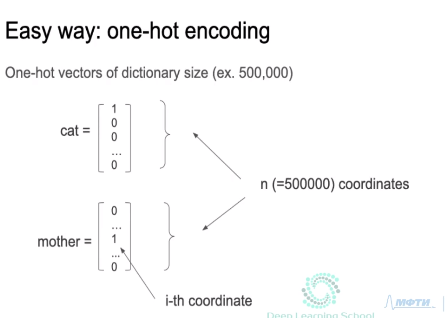

Что мы хотим от представления слов в компьютере? Мы хотим каким-то образом сравнивать слова. Представляя слова OH-векторами. Данные вектора все ортогональный, поэтому расстояние между ними либо 0, либо 1. Поэтому такое представление какое-то странное, не сравнить особо.

**Минсусы OHE:**

- векторы не содержат никакого смысла
- невозможность сравнивания векторов между собой

Как мы оцениваем слова? По контексту.

### Context Embeddings: more clever way.

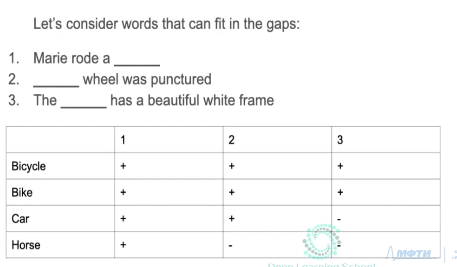
Можем ли мы вставлять слова.

Передставим каждое слово в виде вектора, у вектора j-ой компонентой каждая координата будет обозначать сколько раз встречалось данное слово вместе с i-м словом в данном контексте (слева или справа).

Мы добавили смысл в наши вектора.

**Минусы Context Embeddings**:

PCA - матрица другой размерности. Проекция на меньшее линейное подпространство. 
Делаем reduction c PCA. Получаем матрицу меньшей размерности.

1. У редкого слова будет разряженный вектор, состоящий практически из всех нулей. Расстояние от других слов будет таким же, как расстояние от редких слов.
2. Долгое время работы
3. Если мы добавляем новый текст, то каждый вектор нужно обновлять (логично).
4. Векторы не очень.

### Latent Semantic Analysis

Допустим, что у нас есть большое количество текста разных жанров, смысла.
Сделаем большую матрицу (document, word). На пересечении поставим сколько раз слово встречается в каждом тексте.
Применяем **SVD** разложение: раскладываем квадратную матрицу на 3 матрицы.
Вторая матрица - квадратная  и не имеет особого значения.

Первая матрица - строки векторов документов, третья - столбцы вектором документов.
Можем сравнивать данные слова по **cosint metric** (косинусное расстояние). Если косинусное расстояние большое для векторов, то слова похожи друг с другом.
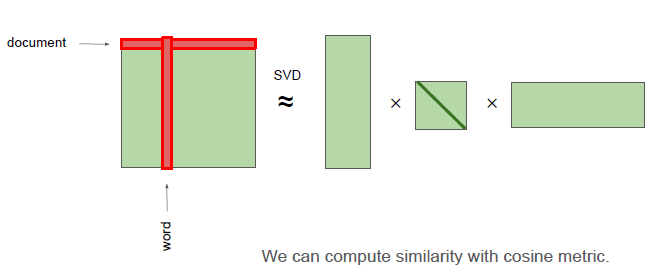

Фильмов много и необходимо рекомендовать фильмы, которые вы смотрите. Хороший результат показали два человека с SVD разложением. Матрицы какой человек смотрел какой фильм (фильм, человек). Получили вектора фильмов и людей.

**Минусы LSA**
1. Если добавляется документ, то нужно пересчитывать матрицу
2. Долго считается
3. Качество плохое, теряется контекст.

**Tf-idf**

Про представление тематических документов. Та же самая матрица, только не будем раскладывать в SVD.

$|D|$ - мощность документов. $\sum_k n_k$- сумма слов в документе. $n_t$ - количество слов на пересечении.

$tf(t,d) = \frac{n_t}{\sum_k n_k}$ - встречаемость слова в документе делить на общее количество слов в документе -  **Важность** слова для документа.

idf - количество докуметов в базе, пара (термин, документ) поделить на количество документов, в которых присутствует этот термин.

$idf(t,D) = \frac{|D|}{|\{d_i \in D | t \in d_i\}|}$
idf - inverse document frequency

Если возьмем слово a, то оно будет встречаться в каждом тексте, поэтому IDF будет равен единице - часто встречается.

tf-idf(t,d,D) = tf(t,d) * idf(t,D).

Можно выделять специфические методы

Все, что мы делали до этого - собирали матрицы слов. Это были векторы со смыслом. Но как мы будем учить ?


## Представление векторов для обучения.

### Word2Vec

Будем использовать ту же самую идею как и про контекст. 
Мы хотим максимизировать вероятность нахождения **ближайших** слов на основании каких-то **центральных** слов. 
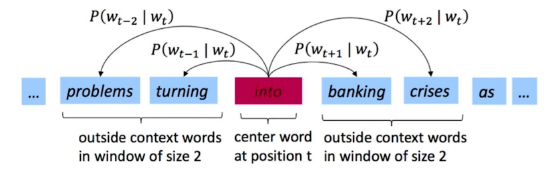
Будем передвигаться какими-то срезами. Теперь будем максимизировать вероятность встретить into при условии банков.

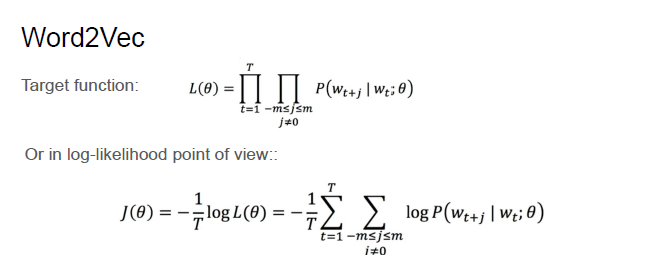

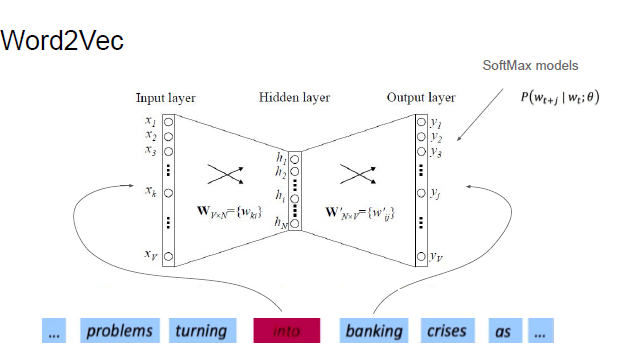
Нейронная линейная сеть будет состоять из двух слоев, никаких активация не будет между ними. На вход будет подаваться вектор слова, на выходе будут выдавать вероятность слова. 
Количество нейроной в первом и последнем слове - размер словаря, которые будем прогонять через SOFTMAX.

Получаем вероятность встретить слово в контексте.

Вопрос в следующем - где брать вектора.
Допустим, мы подали на вход вектор ONE HOT ENCODING.
Омега - матрица весов (50000,...). При умножении вектора на матрицу, то получится один столбец из матрицы омега. Данную строку мы и будем называть **Embdedding** слова.

Когда мы получили вероятность 0.5, то мы получили произведение embedding на матрицу.

Два ембеддинга, полученные из двух различных матриц весов.
Эмбеддинги матрицы V будут эмбедингами слова, если слово в центре и мы ищем соседей.
Эмбеддинги матрицы U - слово хотим поставить рядом к другому слову.

- u - контекстное векторное слово
- v - центральное векторное слово

Мы берем в качестве эмбеддинга и данные слова можно сравнивать на cosine similarity.

Что есть SOFTMAX? Мы хотим, чтобы числитель стал больше -> числитель был больше -> скалярное произвдение векторов эмбедннинга (into, banging). А чтобы скалярнре произведение Into и других слов была меньше.

Word2Vec: Skip-Gram:
Количество крыльев - слайз окна - 1
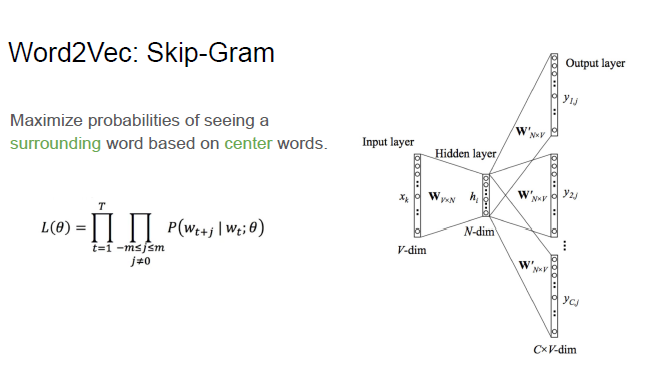
Для того чтобы определять вероятности многих слов, будем использовать предыдущю модель и предсказывать вероятности для слов, оторые находятся рядышком. Количества крыльев - surrounding Words.

Функция потерь - мы пытаемся максимизиировать вероятности встретить слова контекста при условии центрированного слова, перемножаем вероятности и максимизируем.

Нужно еще предсказывать центральные слова по контексту.

### Word2Vec: CBOW
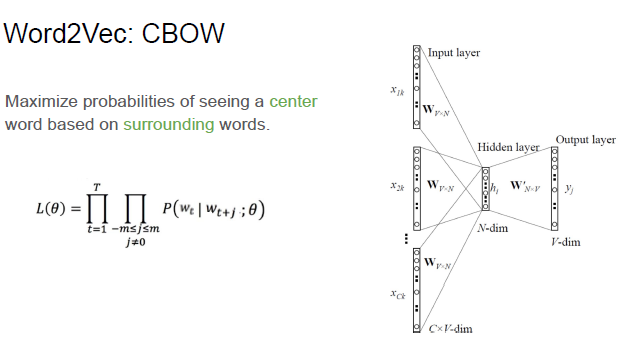

SVD разложение ~~ Word2Vec with negative sampling

У Word2Vec есть минус, он заключается в том, что сумма нормирования большая.

### Пример работы Word2Vec.

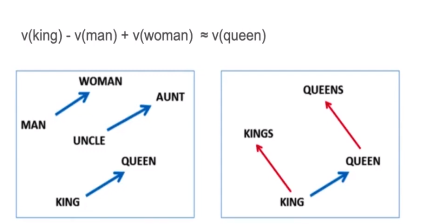

Берем эмбединги, прогоняем через PCA или PCE в двумерное пространство прогоняем. 
Если соединим векторами точки мужчи и женщин, если соединить вектром точки мужчин и женщин, то женщины получатся коллинеарными.

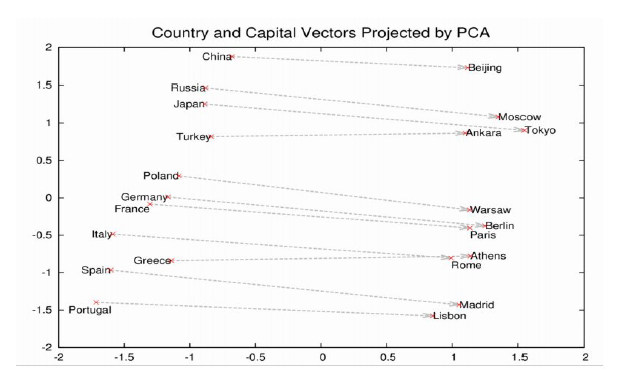
Примерно все одинаковые близость слов в тексте. Прогоняем слово и делаем Back Propogantion.

Word2Vec - способ задавния Эмбеддингу.
FastText от Facebook.

### GloVe

Преобразование Word2Vec. Мы считали частоту пар слов в контекстах. Немножко переделаем Objective Function. 

Перед тренировкой на текстах подсчитаем встречаемость пар слов $[\text{word}_i, \text{word}_j]$.
После этого посчитаем вероятности $P_{ij} = P([\text{word}_i, \text{word}_j])$

В качестве целевой функции будем использовать следующее:
$J(\theta) = \frac{1}{2}\sum_{i,j=1}^{W} {f(P_{ij})}(u_i^T\cdot v_j-\log{P_{ij}))^2}$

Отнимается от скалярного произведения, рассмотренного ранее. Добавлется еще один фактор:
**Discount factor for rate words**: $f(P_{ij})$

### FastText

У нас много сложных слов: Одинаковые начала,но разные окончания, разные падежи, но разные окончания. В FastText мы делим слова на 2-3 буквы сделали n-grams и на этом обучается FastText.

BPE - более умная вещь разделения слов на куски.

**Плюсы FastText**:

1. Решается проблема нечасто встречающихся слов. Сетка делит редко встречающаееся слово, не понимает что это за слово, делит на кусочки данное слово, а кусочки каждого слова слепляет эмбединг из слова и все хорошо.

2. Мы можем обучать на слова Word2Vec, поделить слова и дообучать.

### Sentence embeddings

Мы говорили раньше, что есть Units в языке. Теперь будут юниты в качстве единичных жлеметов и будем предскзаывать предложения рядом с предожениями. 

1. Будем спрашивать могут ли стоять два предложения друг за другом.
2. Что стоит дальше?

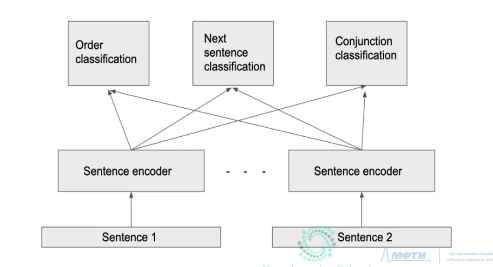

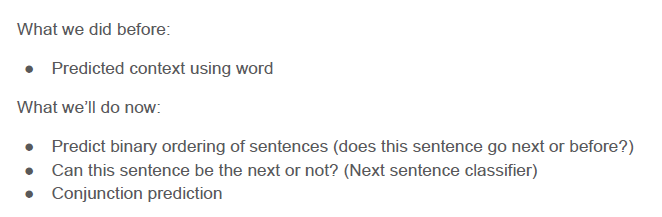

Чтобы научиться решать задачу, то необходимо понять.

### Language similarities

Визуализируем на англмийское пространство, на испанское. И потом накладываем одно пространстов на другое и пытаемся сопоставить.

## Вывод:

1. Обучаем нейронную сеть, берущую Embdedings, логистическая функция потерь, обучается на функции потерь.

2. Сементический анализ

3. Text classification
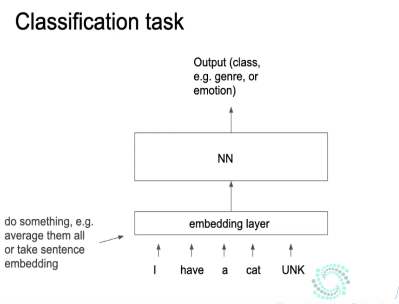


---

<h2 style="text-align: center;"><b>Word embeddings</b></h2>

Libraries we will need today (actually 2 first of them you'll need afterwards, too)

In [1]:
!pip install --upgrade nltk gensim bokeh

Requirement already up-to-date: nltk in c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages (3.4.5)
Requirement already up-to-date: gensim in c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages (3.8.1)
Requirement already up-to-date: bokeh in c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages (2.0.1)


**NLTK** (Natural Language Toolkit) -- a library with many features to work with natural language (e.g. lemmatization, tokenization, etc.)

https://www.nltk.org

We wull use it for tokenization for now.

In [4]:
!wget -O quora.txt https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
from nltk.tokenize import WordPunctTokenizer
import io

tokenizer = WordPunctTokenizer()
quora = list(io.open("./quora.txt", encoding='utf-8'))
# look at 10th question from the dataset
print(tokenizer.tokenize(quora[13]))

['Is', 'Windows', 'the', 'only', 'OS', 'that', 'is', 'not', 'based', 'on', 'UNIX', 'or', 'Linux', '?']


Let's tokenize all the texts from quora.txt file and get array of arrays of tokens:

In [2]:
quora_tokenized = [tokenizer.tokenize(line.lower()) for line in quora]

There are many different models to train to get word embeddings (Word2Vec, GloVe, FastText, etc). For now let's try to train word2vec.

Library **gensim** will help us with that -- it provides models for Word2Vec training and further vectors' investigation

In [3]:
from gensim.models import Word2Vec
# define a model (just like torch model) with parameters
# and train it on our data
model = Word2Vec(quora_tokenized, # data for model to train on
                 size=32,         # embedding vector size
                 min_count=5,     # consider words that occured at least 5 times
                 window=3).wv     # define context as a 3-word window around the target word

Now we have trained model and can play with it:

In [4]:
# we can get a vector for any word in our vocabulary
model.get_vector('tv')

array([ 0.76909024, -0.81411624, -0.34971723, -1.9535961 , -1.2121042 ,
       -1.5082691 ,  0.30241683,  3.5318377 ,  3.8936582 ,  0.89111507,
        0.3721101 , -0.1150682 , -0.41329357,  1.2741642 ,  1.683378  ,
       -4.997052  , -1.0521281 ,  4.290226  ,  0.74367374, -1.022415  ,
       -3.1805193 ,  2.7125587 , -3.1134272 ,  0.73177004,  2.1172822 ,
       -0.9040225 , -0.7981828 , -0.3744906 ,  1.127776  , -0.06661374,
        1.1174982 ,  0.74557185], dtype=float32)

In [5]:
# and get words that have most similar vectors to vector of the given word
model.most_similar('tv')

[('television', 0.8868507146835327),
 ('anime', 0.7985832691192627),
 ('netflix', 0.7921216487884521),
 ('game', 0.7467553615570068),
 ('games', 0.742699921131134),
 ('playlist', 0.7245832085609436),
 ('video', 0.7191919088363647),
 ('hbo', 0.7189880609512329),
 ('dvd', 0.7168940305709839),
 ('player', 0.7153650522232056)]

Nice!

But actually for big tasks as text classifications or something like we would like to have better vectors. If we started training them by ourselves, we would need a LARGE text corpus and LARGE amount of memory and time. But as we are poor students by now, and need to do our homework till the next week, we don't have it all by now.

That is why there are pre-trained models or even pre-computed word vectors collections!

In [6]:
import gensim.downloader as api
model = api.load('glove-twitter-25') # list of available models: https://github.com/RaRe-Technologies/gensim-data#models

In [13]:
# who is a person who has money and related to coding, but is really stupid?
# (it's how a model trained on text corpus thinks, not me)
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('realtor', 0.8265186548233032),
 ('gfx', 0.8249695897102356),
 ('caterers', 0.798202395439148),
 ('beatmaker', 0.7936854362487793),
 ('recruiter', 0.7892400622367859),
 ('sfi', 0.784467339515686),
 ('sosh', 0.7840631604194641),
 ('promoter', 0.7838252186775208),
 ('smallbusiness', 0.7786215543746948),
 ('promoters', 0.7764680981636047)]

Also using gensim we can load pre-trained vectors from vectors file. We can for example load pre-trained google word2vec vectors:

http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/

In [0]:
# from gensim.models import KeyedVectors
# model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True) 

## Visualization

So let's visualize our embeddings on 2-d space. 

What we need is:
1. get embeddings for a batch of words from the gensim model
2. reduce dimensionality of those embeddings from 100-dim to 2-dim vectors
3. normalize those vectors
4. draw it on a plane!

So let's do that:

In [14]:
# let's get some most popular words from model:
n_words = 1000
words = sorted(model.vocab.keys(), 
               key=lambda word: model.vocab[word].count, # sort by number of word occurencies
               reverse=True)[:n_words]

print(words[::10])

['<user>', 'i', ')', 'no', 'la', 'o', '>', 'are', 'we', '♥', '_', 'now', '~', 'people', "'re", '>>', '[', 'q', 'je', 'never', 'please', 'c', 'hahaha', 'لا', 'then', 'itu', 'had', 'ah', 'esta', 'does', 'apa', 'les', 'work', 'god', 'ha', 'their', 'в', '\\', 'gue', '＾', 'justin', 'thing', 'hope', 'nigga', 'udah', 'same', 'voy', 'find', 'اللي', 'face', 'text', 'kau', 'very', 'may', 'pretty', 'already', 'qué', 'día', 'money', 'name', 'hari', 'wow', 'black', 'vamos', 'nao', 'head', 'trying', 'lot', 'ان', 'mad', 'playing', '✌', 'own', 'friday', 'estar', 'yet', 'une', 'mana', 'لي', 'car', 'once', 'nem', 'summer', 'fan', 'tudo', 'sexy', 'sea', 'excited', 'far', 'lost', 'sei', 'sabe', 'picture', 'dice', 'km', 'fast', 'moi', 'anda', 'noche', 'relationship']


In [15]:
# get embeddings for those words
word_vectors = [model.get_vector(word) for word in words]

For vectors visualization we need to reduce dimensionality of vectors to 2 (or 3). We'll use **PCA** for that

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Хотим отобразить как-то слова в двумерное пространство. Хотим, чтобы наши вектора отобразились в мерное пространство. Хотим две оси, по которой вектора будут как-то отличаться друг от друга. Будем выбирать из 25 размерностей две размерности, по которым вектора будут отличаться.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(word_vectors)
word_vectors_pca = pca.transform(word_vectors)

Also let's normalize vectors we got from PCA for better visibility

We already did normalization by hand in one of the first homeworks in our course, but for now let's use sklearn api:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(word_vectors_pca)
word_vectors_pca = ss.transform(word_vectors_pca)

Finally we are to draw an (interactive!) space of embeddings, using function below:

In [18]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig


draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

Loading BokehJS ...

Figure(id='1003', ...)

Well, as we can see, this space does not look perfect, sometimes we see (it seems) different words grouped together.

That happend mostly because our way to reduce dimensionality of vectors (PCA)  is not perfect. Let's try to use different algorithm for doing this: TSNE.

TSNE is in some way creates embeddings itself, so we may hope that it will work better)

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://distill.pub/2016/misread-tsne/

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=50)
tsne.fit(word_vectors)
word_vectors_tsne = tsne.transform(word_vectors)

ss = StandardScaler().fit(word_vectors_tsne)
word_vectors_tsne = ss.transform(word_vectors_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.265s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.229689
[t-SNE] Computed conditional probabilities in 0.253s
[t-SNE] Iteration 50: error = 66.1601105, gradient norm = 0.3034438 (50 iterations in 1413.148s)
[t-SNE] Iteration 100: error = 64.8109283, gradient norm = 0.2690461 (50 iterations in 587.226s)
[t-SNE] Iteration 150: error = 65.5300827, gradient norm = 0.2782250 (50 iterations in 51.001s)
[t-SNE] Iteration 200: error = 65.7011795, gradient norm = 0.2886916 (50 iterations in 70.352s)
[t-SNE] Iteration 250: error = 65.4201889, gradient norm = 0.2747577 (50 iterations in 56.028s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.420189
[t-SNE] Iteration 300: error = 1.1036240, gradient norm = 0.0013985 (50 iterations in 34.954s)
[t-SNE] Iteration 350: error = 1.0164965, gradient norm 

AttributeError: 'TSNE' object has no attribute 'transform'

In [23]:
word_vectors_tsne = tsne.fit_transform(word_vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.229689
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 65.3342667, gradient norm = 0.3021663 (50 iterations in 32.822s)
[t-SNE] Iteration 100: error = 64.7891235, gradient norm = 0.2664239 (50 iterations in 48.464s)
[t-SNE] Iteration 150: error = 65.6596756, gradient norm = 0.2662237 (50 iterations in 48.559s)
[t-SNE] Iteration 200: error = 65.7274704, gradient norm = 0.2677971 (50 iterations in 42.914s)
[t-SNE] Iteration 250: error = 65.6113434, gradient norm = 0.2745235 (50 iterations in 47.152s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.611343
[t-SNE] Iteration 300: error = 1.1208422, gradient norm = 0.0030413 (50 iterations in 29.473s)
[t-SNE] Iteration 350: error = 1.0275840, gradient norm = 0

In [24]:
ss = StandardScaler().fit(word_vectors_tsne)

In [25]:
word_vectors_tsne = ss.transform(word_vectors_tsne)

In [26]:
output_notebook()
draw_vectors(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], token=words)

Loading BokehJS ...

Figure(id='1110', ...)